In [2]:
import pandas as pd
import numpy as np
#import seaborn as sns
import os
#import glob as gb
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model

import warnings
import matplotlib.pyplot as plt

#sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
train_path = '..//zarasl-database-54k'

In [4]:
arabic_alphabet = ['ع', 'ال', 'أ', 'ب', 'د', 'ظ', 'ض', 'ف', 'ق', 'غ', 'ه', 'ح', 'ج', 'ك', 'خ', 'لا', 'ل', 'م', 'ن', 'ر', 'ص', 'س', 'ش', 'ط', 'ت', 'ث', 'ذ', 'ة', 'و', 'ئ', 'ي', 'ز']

In [5]:
data = pd.read_csv('..//zarasl-database-54k//Labels/ImagesClassPath.csv') 
data.head(-1)

,id,ClassId,ImagePath
0,1,0,ArASL_Database_54K/ain/AIN (1).JPG
1,2,0,ArASL_Database_54K/ain/AIN (10).JPG
2,3,0,ArASL_Database_54K/ain/AIN (100).jpg
3,4,0,ArASL_Database_54K/ain/AIN (1000).JPG
4,5,0,ArASL_Database_54K/ain/AIN (1001).JPG
...,...,...,...
54043,54044,31,ArASL_Database_54K/zay/ZAY (994).jpg
54044,54045,31,ArASL_Database_54K/zay/ZAY (995).jpg
54045,54046,31,ArASL_Database_54K/zay/ZAY (996).jpg
54046,54047,31,ArASL_Database_54K/zay/ZAY (997).jpg


In [6]:
for i in range(data.shape[0]):
    data.loc[i, 'ClassId'] = arabic_alphabet[data.loc[i, 'ClassId']]
data.head(-5)



,id,ClassId,ImagePath
0,1,ع,ArASL_Database_54K/ain/AIN (1).JPG
1,2,ع,ArASL_Database_54K/ain/AIN (10).JPG
2,3,ع,ArASL_Database_54K/ain/AIN (100).jpg
3,4,ع,ArASL_Database_54K/ain/AIN (1000).JPG
4,5,ع,ArASL_Database_54K/ain/AIN (1001).JPG
...,...,...,...
54039,54040,ز,ArASL_Database_54K/zay/ZAY (990).jpg
54040,54041,ز,ArASL_Database_54K/zay/ZAY (991).jpg
54041,54042,ز,ArASL_Database_54K/zay/ZAY (992).jpg
54042,54043,ز,ArASL_Database_54K/zay/ZAY (993).jpg


In [7]:
df = pd.DataFrame({'img':data['ImagePath'],
                   'class':data['ClassId']})
df.head(-5)

,img,class
0,ArASL_Database_54K/ain/AIN (1).JPG,ع
1,ArASL_Database_54K/ain/AIN (10).JPG,ع
2,ArASL_Database_54K/ain/AIN (100).jpg,ع
3,ArASL_Database_54K/ain/AIN (1000).JPG,ع
4,ArASL_Database_54K/ain/AIN (1001).JPG,ع
...,...,...
54039,ArASL_Database_54K/zay/ZAY (990).jpg,ز
54040,ArASL_Database_54K/zay/ZAY (991).jpg,ز
54041,ArASL_Database_54K/zay/ZAY (992).jpg,ز
54042,ArASL_Database_54K/zay/ZAY (993).jpg,ز


In [8]:
df_train, df_test = train_test_split(df, test_size=0.1, shuffle=True)

print('Train shape:', df_train.shape)
print('Test shape:', df_test.shape)

Train shape: (48644, 2)
Test shape: (5405, 2)


In [9]:
size  = 64
channels = 1
batch = 128
epochs = 25
steps_per_epoch=  data.shape[0] // batch

In [12]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=False)

datagenScale = ImageDataGenerator(rescale=1./255)


In [13]:
X_train = datagen.flow_from_dataframe(
    df_train, 
    directory = train_path, 
    x_col = 'img',
    y_col = 'class',
    target_size = (size,size),
    color_mode = 'grayscale',
    shuffle = True,
    batch_size = batch)

X_test = datagenScale.flow_from_dataframe(
    df_test, 
    directory = train_path, 
    x_col = 'img',
    y_col = 'class',
    target_size= (size,size),
    color_mode = 'grayscale',
    shuffle = True,
    batch_size = batch)

Found 48644 validated image filenames belonging to 32 classes.
Found 5405 validated image filenames belonging to 32 classes.


In [ ]:

for batch in X_train:
    print(batch[0].shape)  
    print(batch[1])       
    break  


(128, 64, 64, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


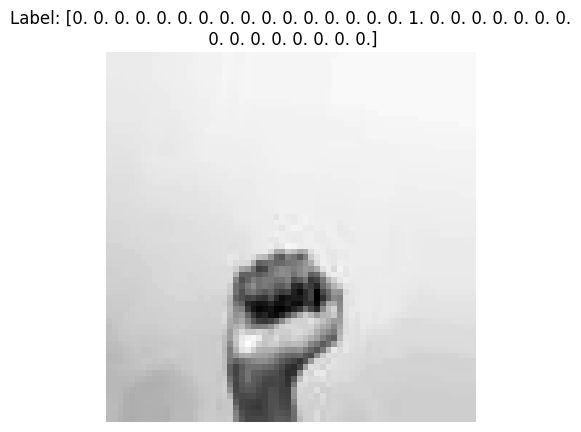

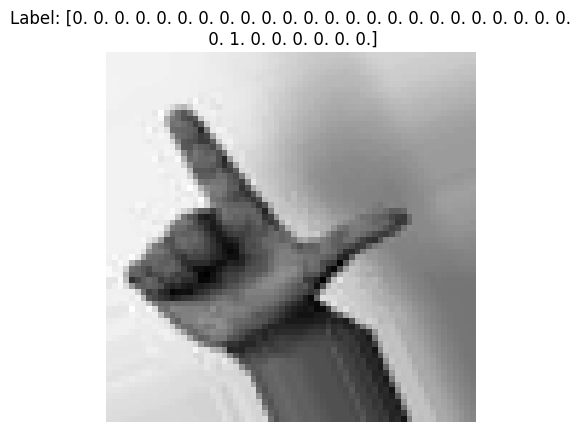

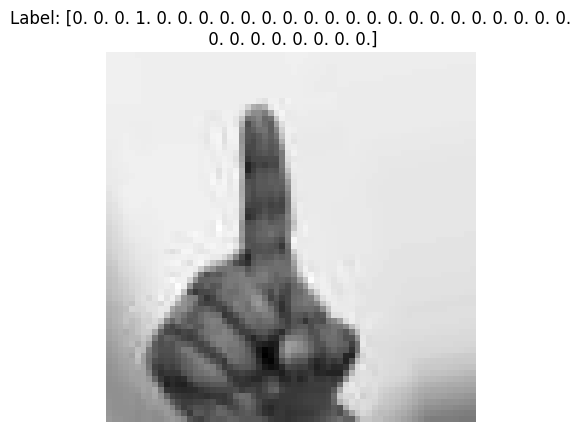

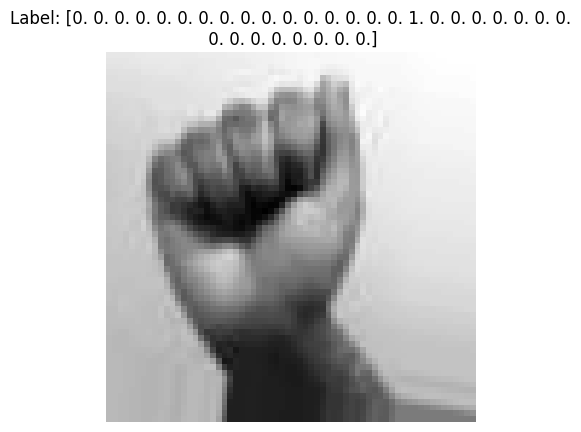

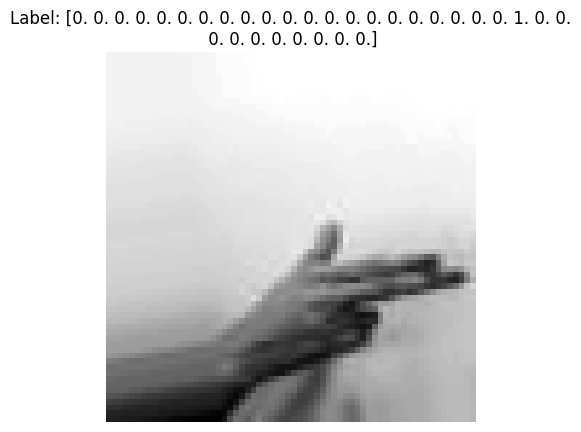

In [ ]:
#import matplotlib.pyplot as plt

# Assuming X_train is an ImageDataGenerator object
# Extract a batch of images and labels
batch = X_train[0]

# Display the first few images and their labels
num_images_to_display = 5
for i in range(num_images_to_display):
    image = batch[0][i]  # Extracting the ith image from the batch
    label = batch[1][i]  # Extracting the corresponding label
    plt.imshow(image, cmap='gray') 

    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


In [ ]:
checkpoint_filepath = 'ArSL-BestModel.keras'
optimizer = Adam(learning_rate=0.001)

callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.003, patience=25)

callbacks = [callback_checkpoint, callback_earlystopping]

In [ ]:
X_train.class_indices

{'أ': 0,
 'ئ': 1,
 'ال': 2,
 'ب': 3,
 'ة': 4,
 'ت': 5,
 'ث': 6,
 'ج': 7,
 'ح': 8,
 'خ': 9,
 'د': 10,
 'ذ': 11,
 'ر': 12,
 'ز': 13,
 'س': 14,
 'ش': 15,
 'ص': 16,
 'ض': 17,
 'ط': 18,
 'ظ': 19,
 'ع': 20,
 'غ': 21,
 'ف': 22,
 'ق': 23,
 'ك': 24,
 'ل': 25,
 'لا': 26,
 'م': 27,
 'ن': 28,
 'ه': 29,
 'و': 30,
 'ي': 31}

In [ ]:
Model = Sequential([
    
                    Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    BatchNormalization(),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.25),  
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    BatchNormalization(),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.25),                
                    Conv2D(filters=512,  kernel_size=(3,3), activation="relu"),
                    BatchNormalization(),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.25),    
                    Conv2D(filters=2048,  kernel_size=(3,3), activation="relu"),
                    BatchNormalization(),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.25),
                    Flatten(),
                    BatchNormalization(),
                    Dense(units=4096, activation="relu"), 
                    BatchNormalization(),
                    Dropout(0.25),
                    Dense(units=1024, activation="relu"), 
                    BatchNormalization(),
                    Dropout(0.25),                 
                    Dense(units=256, activation="relu"),
                    BatchNormalization(),
                    Dropout(0.25),                                                                    
                    Dense(units=64, activation="relu"),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(units=32, activation="softmax"),
])


Model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 2048)     │     9,439,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 5, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 18432)          │        73,728 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    75,501,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     4,195,32

 Total params: 90,151,072 (343.90 MB)

 Trainable params: 90,097,888 (343.70 MB)

 Non-trainable params: 53,184 (207.75 KB)

In [ ]:
history = Model.fit(X_train, validation_data=X_test, epochs=epochs,  callbacks=callbacks)

Epoch 1/25


RuntimeError: pybind11::error_already_set: MISMATCH of original and normalized active exception types: ORIGINAL ResourceExhaustedError REPLACED BY KeyboardInterrupt: <EMPTY MESSAGE>

At:
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\framework\errors_impl.py(377): __init__
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\eager\execute.py(53): quick_execute
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\eager\context.py(1500): call_function
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\eager\polymorphic_function\atomic_function.py(251): call_flat
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\eager\polymorphic_function\atomic_function.py(216): call_preflattened
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\eager\polymorphic_function\concrete_function.py(1322): _call_flat
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\eager\polymorphic_function\polymorphic_function.py(919): _call
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\eager\polymorphic_function\polymorphic_function.py(833): __call__
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\traceback_utils.py(150): error_handler
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py(329): fit
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py(117): error_handler
  C:\Users\7ABSA\AppData\Local\Temp\ipykernel_6508\4129568260.py(1): <module>
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py(3526): run_code
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py(3466): run_ast_nodes
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py(3284): run_cell_async
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py(129): _pseudo_sync_runner
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py(3079): _run_cell
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py(3024): run_cell
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py(549): run_cell
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py(449): do_execute
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py(778): execute_request
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py(362): execute_request
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py(437): dispatch_shell
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py(534): process_one
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py(545): dispatch_queue
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py(80): _run
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py(1922): _run_once
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py(607): run_forever
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py(205): start
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py(739): start
  c:\Users\7ABSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py(1043): launch_instance
  C:\Users\7ABSA\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py(18): <module>
  <frozen runpy>(88): _run_code
  <frozen runpy>(198): _run_module_as_main


In [ ]:
Model.save('finalmodel.h5')

In [15]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
Modelf = tf.keras.models.load_model('finalmodel.h5')

y_pred = Modelf.predict(X_test)


all_y_pred_binary = []
all_y_true = []

for i in range(len(X_test)):
    batch_x, batch_y = next(X_test)
    batch_pred = Modelf.predict(batch_x) 
    batch_pred_binary = (batch_pred > 0.5).astype(int)
    all_y_pred_binary.extend(batch_pred_binary)
    all_y_true.extend(batch_y)

mcm = multilabel_confusion_matrix(all_y_true, all_y_pred_binary)
tp = mcm[:, 1, 1]
tn = mcm[:, 0, 0]
fp = mcm[:, 0, 1]
fn = mcm[:, 1, 0]

accuracy = accuracy_score(all_y_true, all_y_pred_binary)
precision = precision_score(all_y_true, all_y_pred_binary, average='micro')
recall = recall_score(all_y_true, all_y_pred_binary, average='micro')
f1score = f1_score(all_y_true, all_y_pred_binary, average='micro')

print("Confusion Matrix:")
for i in range(len(tp)):
    print(f"Class {i+1}:")
    print("TN:", tn[i], "FP:", fp[i])
    print("FN:", fn[i], "TP:", tp[i])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)


loaded_model = load_model('finalmodel.h5')



MemoryError: Unable to allocate 288. MiB for an array with shape (18432, 4096) and data type float32

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model('finalmodel.h5')

# Function to preprocess a single image
def preprocess_image(image_path, size):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, (size, size))
    # Reshape the image to match model input shape
    image = image.reshape(-1, size, size, 1)
    # Normalize the image
    image = image / 255.0
    return image
class_names =['أ', 'ئ', 'ال', 'ب', 'ة', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'لا', 'م', 'ن', 'ه', 'و', 'ي']
# Path to your single test image
test_image_path = 'zarasl-database-54k/ImagesToPred/output-onlinejpgtools(1).jpg'

# Preprocess the single test image
preprocessed_image = preprocess_image(test_image_path, size)

# Perform prediction
prediction = model.predict(preprocessed_image)

# Interpret the prediction
predicted_class_index = np.argmax(prediction)
print("Predicted class index:", predicted_class_index)
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 473ms/step
Predicted class index: 20
Predicted class: ع


1/1 [==============================] - 0s 67ms/step


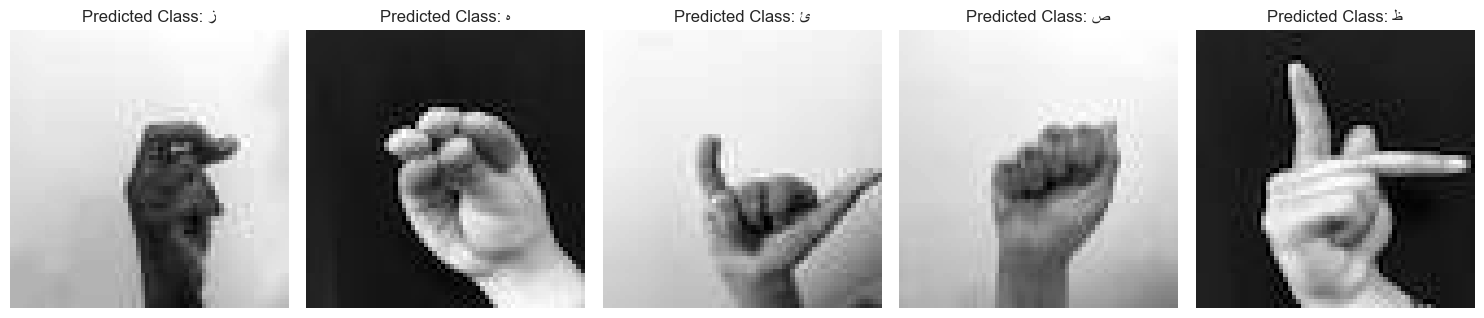

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
class_names =['أ', 'ئ', 'ال', 'ب', 'ة', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'لا', 'م', 'ن', 'ه', 'و', 'ي']

# Load the saved model
loaded_model = load_model('finalmodel.h5')

# Choose random images from the test set
num_images_to_show = 5
random_indices = np.random.choice(len(df_test), num_images_to_show)

# Set up the grid layout
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))

# Preprocess the images and make predictions
for i, idx in enumerate(random_indices):
    image_path = df_test.iloc[idx]['img']
    image = plt.imread(os.path.join(train_path, image_path))
    image = image.reshape((1, size, size, channels)) / 255.0  # Reshape and normalize the image
    
    # Make prediction
    prediction = loaded_model.predict(image)
    predicted_class = class_names[np.argmax(prediction)]
    
    # Display the image and its predicted class
    axes[i].imshow(image.reshape((size, size)), cmap='gray')
    axes[i].set_title(f'Predicted Class: {predicted_class}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import tensorflow as tf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare input data (replace this with your actual input data)
input_data = np.random.rand(1, 64, 64, 1).astype(np.float32)  # Example input data (modify as needed)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Process output (replace this with your post-processing code)
predicted_class_index = np.argmax(output_data)
predicted_class = class_names[predicted_class_index]  # Example output processing (modify as needed)

print("Predicted class:", predicted_class)
